In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import fastf1 as ff1
import fastf1.plotting
from timple.timedelta import strftimedelta
from fastf1.livetiming.data import LiveTimingData
#from fastf1.core import Laps

import collections
from functools import cached_property
import logging
import warnings

import numpy as np
import pandas as pd

from fastf1 import api, ergast
from fastf1.utils import recursive_dict_get, to_timedelta


In [3]:
fastf1.plotting.setup_mpl()

In [4]:
bharain = ff1.get_session(2023, 'Bahrain', 'Q' )
bharain.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31'

In [5]:
# Qualifying
# Alonso
alo = bharain.laps.pick_driver('ALO').pick_fastest()
alo_car_data = alo.get_telemetry().add_distance()

tQ = alo_car_data['Time']
vCarQ = alo_car_data['Speed']

# Verstappen 
ver = bharain.laps.pick_driver('ALO').pick_fastest()
ver_car_data = alo.get_telemetry().add_distance()

tVQ = alo_car_data['Time']
vCarVQ = alo_car_data['Speed']

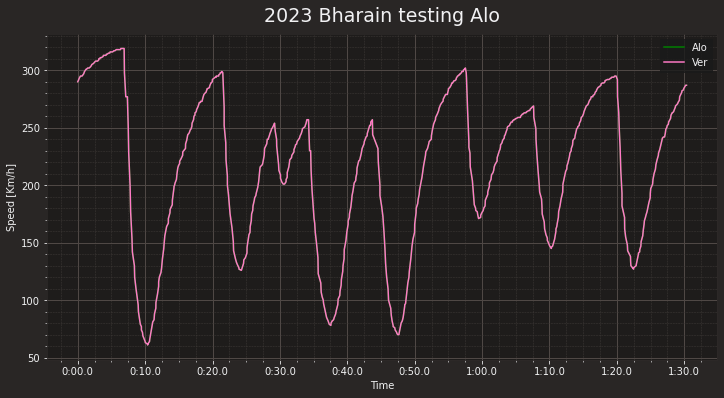

In [7]:
# Qualifying
# Make plot a bit bigger
plt.rcParams['figure.figsize']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tQ, vCarQ, 'g', label='Alo')
ax.plot(tVQ, vCarVQ, label='Ver')

ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('2023 Bharain testing Alo')
ax.legend()
#plt.autoscale()
# Calculate the minimum and maximum values of vCarQ and vCarVQ
#y_min = min(min(vCarQ), min(vCarVQ))
#y_max = max(max(vCarQ), max(vCarVQ))
#y_range = y_max - y_min

# Set the y limits to be slightly larger than the range of vCarQ and vCarVQ
#ax.set_ylim([y_min - 0.1 * y_range, y_max + 0.1 * y_range])

plt.show()

In [41]:
bharainR = ff1.get_session(2023, 'Bahrain', 'R' )
bharainR.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [42]:
bharainFP2 = ff1.get_session(2023, 'Bahrain', 'FP2' )
bharainFP2.load()

core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '44', '31', '27', '24', '23', '22', '21', '20', '18', '16', '14', '11', '10', '4', '2', '77', '81']


In [43]:
bharainFP3 = ff1.get_session(2023, 'Bahrain', 'FP3' )
bharainFP3.load()

core           INFO 	Loading data for Bahrain Grand Prix - Practice 3 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '44', '31', '27', '24', '23', '22', '21', '20', '18', '16', '14', '11', '10', '4', '2', '77', '81']
